![](http://thecads.org/wp-content/uploads/2017/02/adax_logo.jpg)
# Module 4.2: Cross-Validation

When performing machine learning, NEVER learn the parameters of a prediction function and test it on the SAME data. This is a big mistake! You can say that: the machine has already "seen" the data before, hence we still don't know how it will perform with DIFFERENT data.

A model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. To avoid this "over-estimation" of performance, it is a common practice when performing a supervised machine learning experiment to hold out part of the available data as a test set: (X_test, y_test) that we have seen so far. Note that the word "experiment" is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally. A mini "experiment" is required to try mimic how your machine learning algorithm would perform in a real-world scenario later on.

In scikit-learn, a random split into training and test sets can be quickly computed with the `train_test_split` helper function as we have seen many times before. 

### "Validation set" still necessary?

When evaluating different hyperparameters for estimators, such as the `C` setting in an SVM, there is a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally on it. We call this a "leaking" of knowledge about the test set into the model; hence the evaluation metrics no longer report correctly. To better mimic a real world scenario, we need to hold out another part of the dataset: the so-called "validation set". Train as per the norm, the finding of the best hyperparameters is done on the validation set, and when the best settings are found, evaluation can be done on the test set.

However, by partitioning the available data into three sets (training, validation, test), we drastically reduce the number of samples which can be used for learning the model. Also, results can quite dependent on a particular random choice for the pair of (train, validation) sets. 

A solution to this problem is a procedure called **cross-validation** (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called *k-fold CV*, the training set is split into *k* smaller sets. The following procedure is followed for each of the k "folds": A model is trained using *k-1* of the folds as training data, and the resulting model is validated on the remaining part of the data (i.e. which is now technically the test set) to compute a performance measure such as accuracy.

The performance measure reported by k-fold cross-validation is the average of the values computed across all *k* folds. This approach can be computationally expensive, but does not waste too much data. If you have a huge dataset, perhaps partitioning into (training, validation, test) sets can still be done, since k-fold cross-validation may take much longer. 

## Feature extraction, feature selection, refine feature, analysis,algorithm, 3 fold separation, model complexity graph, pick model, validated.

### Cross validation metrics

The simplest way to use cross-validation is to call the `cross_val_score` helper function on the estimator and the dataset.

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_data = load_boston()

In [4]:
print(boston_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
print(boston_data.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [6]:
print(boston_data.target.shape)
print(boston_data.data.shape)

(506,)
(506, 13)


In [23]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
model.fit(boston_data.data, boston_data.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
model.score(boston_data.data, boston_data.target)

0.7406077428649428

The current score is shows about 74% accuracy

By default, the score computed at each CV iteration is the `score` method of the estimator. It is possible to change this by using the `scoring` parameter:

In [34]:
from sklearn import metrics

model_1 = LinearRegression()
scores = cross_val_score(model_1, 
                         boston_data.data[0:350,:], 
                         boston_data.target[0:350], 
                         cv=5)
scores

array([0.77394825, 0.61303844, 0.76186955, 0.8420353 , 0.84853554])

In [11]:
np.mean(scores)

0.7678854152393214

In [37]:
predicted = cross_val_predict(model_1, 
                              boston_data.data[0:350,:], 
                              boston_data.target[0:350], 
                              cv=5)

In [38]:
predicted

array([27.48780759, 24.29443347, 32.61693771, 30.20079915, 31.17121248,
       24.059746  , 20.71807435, 20.11603889, 13.98882323, 18.28335327,
       21.68471144, 19.1752468 , 20.73323431, 18.24115884, 18.4833574 ,
       17.605247  , 20.52053384, 17.92764171, 14.27339046, 16.70045176,
       13.92823872, 17.85731943, 19.85675971, 15.71258095, 16.51644069,
       12.54829078, 15.02134466, 16.83703369, 21.99592011, 24.57824577,
       14.44925088, 18.79373171, 15.76834831, 15.05571585, 17.72485992,
       20.46980443, 19.56673052, 20.37586274, 22.13543492, 29.41291561,
       33.90965299, 31.04445342, 25.10577047, 25.60995593, 22.41614892,
       19.89975693, 20.71207861, 19.61355773, 12.37379776, 16.41307852,
       20.74226257, 21.49449747, 27.53828092, 22.47284425, 13.88645936,
       33.14982468, 22.27062189, 30.01402364, 20.31197787, 18.26952929,
       15.09181898, 16.10471867, 22.12697192, 25.176828  , 27.52345441,
       26.11130673, 20.40367728, 19.10781263, 15.53314423, 18.70

In [39]:
metrics.r2_score(boston_data.target[0:350], predicted)

0.8207953282687247

In [46]:
scores = cross_val_score(model_1,boston_data.data[0:350,:], 
                        boston_data.target[0:350], 
                        cv=5)
scores

array([0.77394825, 0.61303844, 0.76186955, 0.8420353 , 0.84853554])

In [45]:
len(boston_data.target)

506

Wait, what is *f1_macro* under scoring parameter ?

### Useful Sidetrack: Performance metrics

Before moving any further, it is essential to have some basic understanding of performance metrics, what are the different types out there, and which are normally used.

For classification tasks, the **Accuracy** measure is by far the most commonly used. The `score` method usually returns this as well for classification-based estimators. The concept of Accuracy is an easy one: The number of correctly classified test samples over the total number of test samples. However, Accuracy only makes a lot of sense if the class distribution in the dataset is more or less equal. 

Example: Imagine if you have a dataset containing 90% normal emails and 10% spam. Your classifier returns an Accuracy score of 90%. You *could* be classifying all 90% of the emails correctly, and none of the spam correctly! That wouldn't make a very good spam classifier, isn't it? In this case, your classifier is *actually* performing perfect (100%) on the normal class, while flunking (0%) the entire spam class. Averaging across both classes, you can say realistically, your classifier is performing at about 50%. You could figure this out with common sense, but it appears that Accuracy is not the best measure.

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns

In [53]:
from sklearn.datasets import load_iris
iris = load_iris()
model_2 = LogisticRegression()

0.868421052631579

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      0.69      0.81        16
  virginica       0.64      1.00      0.78         9

avg / total       0.92      0.87      0.87        38


[[13  0  0]
 [ 0 11  5]
 [ 0  0  9]]


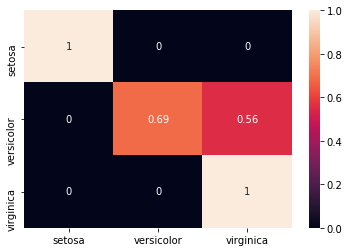

In [56]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target, 
                                                    random_state=0)
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
y_true = y_test
target_names = iris.target_names

print(accuracy_score(y_true, y_pred))
print()
print(classification_report(y_true, y_pred, target_names=target_names))
print()
print(confusion_matrix(y_true, y_pred, labels=[0, 1, 2]))

# seaborn to put on some clothes!
cmat = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
sns.heatmap(cmat/np.sum(cmat,axis=1), 
            annot=True, 
            xticklabels=target_names, 
            yticklabels=target_names)

There is a slight difference in the Accuracy and F1-score. Usually, these two metrics will be very different if there is *class imbalance*. Class imbalance occurs in a dataset when it has a non-equal class distribution of samples. In such cases, the F1-score offers a more accurate reflection of the performance than Accuracy.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png)

The confusion table's rows represent the actual (desired) labels, while the columns represent the predicted labels. Basically this means the diagonals contain the number of correctly predicted labels (actual label and predicted label the same), while the other cells indicate the incorrectly predicted samples.

Precision is the number of true positives over the items that have been selected (predicted labels). Recall is the number of true positives over items that are relevant (desired labels). F1-score is the geometric mean of Precision and Recall, which means it is somewhere at the average of the two values. In an imbalance dataset, the Recall and Precision values can be very far apart, hence F1-score provides an average of that. Use the confusion matrix to verify your understanding of Precision and Recall.

### Back to Cross Validation

One could argue that the `train_test_split` does a good job of evaluating the model by holding out some of the dataset for testing. One disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training. This is not optimal, and can cause problems – especially if the initial set of training data is small.

One way to address this is to use cross-validation; that is, to do a sequence of fits where each subset of the data is used both as a training set and as a validation set. Visually, it might look something like this:

![](resources/5-fold-CV.png)

Here we split the data into five groups, and use each of them in turn to evaluate the model fit on the other 4/5 of the data. This would be rather tedious to do by hand, and so we can use Scikit-Learn's cross_val_score convenience routine to do it succinctly:


In [59]:
scores = cross_val_score(model, 
                         boston_data.data, 
                         boston_data.target, cv=5)
scores

array([ 0.63861069,  0.71334432,  0.58645134,  0.07842495, -0.26312455])

When the cv argument is an integer, `cross_val_score` uses the `KFold` or `StratifiedKFold` strategies by default. It is also possible to use other cross validation strategies by passing a cross validation iterator instead.

In [64]:
from sklearn.model_selection import ShuffleSplit #good for shuffle

n_samples = iris.data.shape[0]
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
cross_val_score(model_2, iris.data, iris.target, cv=cv)

array([0.88888889, 0.97777778, 0.86666667])

`ShuffleSplit` performs random splits on the dataset for cross-validation. This does not guarantee that all folds will be different! But  this is still very likely (to have folds with different samples) for sizeable datasets. Default test size is set to 0.1 by default, so it makes sense for this to work if you have a huge dataset and are just sampling 10% to be test set with only a few splits (like the example above).

### Essential consideration for preprocessing

Just as it is important to test a predictor on data held-out from training, preprocessing steps (such as standardization, feature selection, etc.) and data transformations should similarly be learnt from a training set and applied to held-out data for prediction as well. Instead of doing this manually, you can use the `Pipeline` feature which makes it easier to compose estimators, providing all these steps under cross-validation:

In [21]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

clf = make_pipeline(preprocessing.StandardScaler(), 
                        model_2)
cross_val_score(clf, iris.data, iris.target, cv=cv)

array([0.82222222, 0.86666667, 0.86666667])

This ensures that the `StandardScaler` is applied within the cross-validation loop for both the training data and test data that is partitioned internally.

### Multiple metrics

The `cross_validate` function differs from `cross_val_score` in two ways - 1) It allows specifying multiple metrics for evaluation, 2) It returns a `dict` containing training scores, fit-times and score-times in addition to the test score, which gives us a whole array of performance-related information. 

In [67]:
#from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.svm import SVC
#from sklearn.datasets import load_iris
#iris = load_iris()

scoring = ['precision_macro', 'recall_macro']
clf = SVC(kernel='linear', C=1, random_state=0) # this example uses Support Vector Machine
scores = cross_validate(clf, iris.data, iris.target, scoring=scoring,
                        cv=5, return_train_score=False)

print(sorted(scores.keys()))
print(scores['test_recall_macro'] ) 
print(scores['fit_time'])

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']
[0.96666667 1.         0.96666667 0.96666667 1.        ]
[0.01562786 0.         0.         0.         0.00099611]


### Cross Validation Iterators

**KFold** divides all the samples in k groups of samples, called folds of equal sizes (if possible). The prediction function is learned using k - 1 folds, and the fold left out is used for test.

**RepeatedKFold** repeats K-Fold n times. It can be used when one requires to run KFold n times, producing different splits in each repetition.

**LeaveOneOut** (or LOO) is a simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for n samples, we have n different training sets and n different tests set. This cross-validation procedure does not waste much data as only one sample is removed from the training set. But there are obvious drawbacks: It is computationally expensive since it needs n folds, rather than k folds of KFold. In terms of accuracy, LOO often results in high variance as an estimator for the test error. As such, the reported accuracy is always an over-estimate (too good to be true).

**StratifiedKFold** is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set. This is a very good thing to do especially if your dataset has class imbalance. You do not want to sample too much from a particular large class, which might cause the smaller classes to be poorly sampled for training purposes. This will have an undesirable effect on the training. Hence, the importance to use stratified folds.

**StratifiedShuffleSplit** is a variation of `ShuffleSplit`, which returns stratified splits but randomly sampled, i.e which creates splits by preserving the same percentage for each target class as in the complete set.

See the documentation on how to use these iterators. You can try some of them as well.

There are also cross-validation iterators for grouped data. 

The underlying generative process (like data collection) can yield groups of dependent samples.

Such a grouping of data is domain specific. For example, medical data that has been collected from multiple patients, with multiple samples taken from each patient. Such data is likely to be dependent on the individual group. In this case, the patient id for each sample will be its group identifier. Experimentally, we would like to know if a model trained on a particular set of group generalizes well to other unseen groups. To measure this, we need to ensure that all the samples in the validation fold come from groups that are not represented at all in the training fold.


## "Mini" Kaggle Project

What you have learned so far (ML algorithms, ensemble methods, cross-validation techniques) would be sufficient to equip you towards working on a mini machine learning project from start to end. Basically, you should now be familiar with the entire framework or "experimental pipeline" required to pre-process, learn models, perform predictions and measure performance.

Two larger datasets are suggested here (choose one!), both of which are from Kaggle playground:
* Leaf classification: [https://www.kaggle.com/c/leaf-classification](https://www.kaggle.com/c/leaf-classification)
* Pima Indians Diabetes classification: [https://www.kaggle.com/uciml/pima-indians-diabetes-database](https://www.kaggle.com/uciml/pima-indians-diabetes-database) 

Or if you are really ambitious, why not just try both! 

At the end of the project, you are encouraged to make a submission to Kaggle.